In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.datasets import FashionMNIST
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
data_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

trainset = FashionMNIST('.', train=True, transform=data_transform, download=True)
testset = FashionMNIST('.', train=False, transform=data_transform, download=True)

In [3]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.maxpool = nn.MaxPool2d(2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        # 64*1*32*32
        
        x = self.relu(self.maxpool(self.conv1(x)))  
        # 64*6*28*28 -> 64*6*14*14
        
        x = self.relu(self.maxpool(self.conv2(x)))
        # 64*16*10*10 ->64*16*5*5
        
        x = x.view(x.size(0), -1)
        # 64*400
        
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        # 64*10
        return x

In [4]:
def train(epoch):
    print('training......')
    net.train()
    batch_num = len(trainloader)
    for step, data in enumerate(trainloader):
        img, label = data
        if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()

        out = net(img)
        loss = criterion(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            print_loss = loss.data.item()
            train_loss.append(print_loss)
            print('epoch: {}, batch: {}/{}, loss: {:.4}'.format(epoch, step, batch_num, print_loss))

In [5]:
def test():
    print('testing......')
    net.eval()
    eval_loss = 0
    eval_acc = 0
    for data in tqdm(testloader):
        img, label = data
        if torch.cuda.is_available():
            img = img.cuda()
            label = label.cuda()
        out = net(img)
        loss = criterion(out, label)
        eval_loss += loss.data.item()*label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        eval_acc += num_correct.item()
    print('Test Loss: {:.6f}, Acc: {:.6f}'.format(
        eval_loss/(len(testset)),                  
        eval_acc/(len(testset))
    ))

In [6]:
batch_size = 64
learning_rate = 0.001
num_epoches = 20

In [7]:
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [8]:
net = LeNet()
if torch.cuda.is_available():
    print('使用GPU')
    net = net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

使用GPU


training......
epoch: 0, batch: 0/938, loss: 2.305
epoch: 0, batch: 100/938, loss: 0.5247
epoch: 0, batch: 200/938, loss: 0.6519
epoch: 0, batch: 300/938, loss: 0.5823
epoch: 0, batch: 400/938, loss: 0.5739
epoch: 0, batch: 500/938, loss: 0.666
epoch: 0, batch: 600/938, loss: 0.4672
epoch: 0, batch: 700/938, loss: 0.4934
epoch: 0, batch: 800/938, loss: 0.3703
epoch: 0, batch: 900/938, loss: 0.5244
testing......



Test Loss: 0.468123, Acc: 0.829900
training......
epoch: 1, batch: 0/938, loss: 0.645
epoch: 1, batch: 100/938, loss: 0.4078
epoch: 1, batch: 200/938, loss: 0.3429
epoch: 1, batch: 300/938, loss: 0.3824
epoch: 1, batch: 400/938, loss: 0.3774
epoch: 1, batch: 500/938, loss: 0.4017
epoch: 1, batch: 600/938, loss: 0.2357
epoch: 1, batch: 700/938, loss: 0.2349
epoch: 1, batch: 800/938, loss: 0.2583
epoch: 1, batch: 900/938, loss: 0.2228
testing......



Test Loss: 0.389619, Acc: 0.854200
training......
epoch: 2, batch: 0/938, loss: 0.4645
epoch: 2, batch: 100/938, loss: 0.3037
epoch: 2, batch: 200/938, loss: 0.428
epoch: 2, batch: 300/938, loss: 0.4294
epoch: 2, batch: 400/938, loss: 0.2317
epoch: 2, batch: 500/938, loss: 0.3173
epoch: 2, batch: 600/938, loss: 0.3228
epoch: 2, batch: 700/938, loss: 0.3008
epoch: 2, batch: 800/938, loss: 0.415
epoch: 2, batch: 900/938, loss: 0.2345
testing......



Test Loss: 0.354242, Acc: 0.872900
training......
epoch: 3, batch: 0/938, loss: 0.2773
epoch: 3, batch: 100/938, loss: 0.4506
epoch: 3, batch: 200/938, loss: 0.2888
epoch: 3, batch: 300/938, loss: 0.2161
epoch: 3, batch: 400/938, loss: 0.2896
epoch: 3, batch: 500/938, loss: 0.2947
epoch: 3, batch: 600/938, loss: 0.2462
epoch: 3, batch: 700/938, loss: 0.2112
epoch: 3, batch: 800/938, loss: 0.1669
epoch: 3, batch: 900/938, loss: 0.4132
testing......



Test Loss: 0.333045, Acc: 0.878300
training......
epoch: 4, batch: 0/938, loss: 0.2442
epoch: 4, batch: 100/938, loss: 0.2525
epoch: 4, batch: 200/938, loss: 0.2392
epoch: 4, batch: 300/938, loss: 0.2878
epoch: 4, batch: 400/938, loss: 0.1226
epoch: 4, batch: 500/938, loss: 0.2633
epoch: 4, batch: 600/938, loss: 0.2262
epoch: 4, batch: 700/938, loss: 0.2707
epoch: 4, batch: 800/938, loss: 0.2676
epoch: 4, batch: 900/938, loss: 0.141
testing......



Test Loss: 0.306286, Acc: 0.888500
training......
epoch: 5, batch: 0/938, loss: 0.2789
epoch: 5, batch: 100/938, loss: 0.2409
epoch: 5, batch: 200/938, loss: 0.214
epoch: 5, batch: 300/938, loss: 0.2669
epoch: 5, batch: 400/938, loss: 0.2904
epoch: 5, batch: 500/938, loss: 0.3146
epoch: 5, batch: 600/938, loss: 0.295
epoch: 5, batch: 700/938, loss: 0.2885
epoch: 5, batch: 800/938, loss: 0.5499
epoch: 5, batch: 900/938, loss: 0.1269
testing......



Test Loss: 0.306483, Acc: 0.889100
training......
epoch: 6, batch: 0/938, loss: 0.1902
epoch: 6, batch: 100/938, loss: 0.2796
epoch: 6, batch: 200/938, loss: 0.4233
epoch: 6, batch: 300/938, loss: 0.2422
epoch: 6, batch: 400/938, loss: 0.1866
epoch: 6, batch: 500/938, loss: 0.09823
epoch: 6, batch: 600/938, loss: 0.1559
epoch: 6, batch: 700/938, loss: 0.1781
epoch: 6, batch: 800/938, loss: 0.2385
epoch: 6, batch: 900/938, loss: 0.3918
testing......



Test Loss: 0.300772, Acc: 0.894700
training......
epoch: 7, batch: 0/938, loss: 0.2521
epoch: 7, batch: 100/938, loss: 0.1156
epoch: 7, batch: 200/938, loss: 0.1605
epoch: 7, batch: 300/938, loss: 0.3188
epoch: 7, batch: 400/938, loss: 0.2121
epoch: 7, batch: 500/938, loss: 0.1607
epoch: 7, batch: 600/938, loss: 0.3436
epoch: 7, batch: 700/938, loss: 0.1853
epoch: 7, batch: 800/938, loss: 0.1985
epoch: 7, batch: 900/938, loss: 0.147
testing......



Test Loss: 0.308972, Acc: 0.890800
training......
epoch: 8, batch: 0/938, loss: 0.3493
epoch: 8, batch: 100/938, loss: 0.1432
epoch: 8, batch: 200/938, loss: 0.2869
epoch: 8, batch: 300/938, loss: 0.1562
epoch: 8, batch: 400/938, loss: 0.1031
epoch: 8, batch: 500/938, loss: 0.1957
epoch: 8, batch: 600/938, loss: 0.1409
epoch: 8, batch: 700/938, loss: 0.1772
epoch: 8, batch: 800/938, loss: 0.2116
epoch: 8, batch: 900/938, loss: 0.275
testing......



Test Loss: 0.281279, Acc: 0.898800
training......
epoch: 9, batch: 0/938, loss: 0.3397
epoch: 9, batch: 100/938, loss: 0.1437
epoch: 9, batch: 200/938, loss: 0.1202
epoch: 9, batch: 300/938, loss: 0.1297
epoch: 9, batch: 400/938, loss: 0.1484
epoch: 9, batch: 500/938, loss: 0.1409
epoch: 9, batch: 600/938, loss: 0.2796
epoch: 9, batch: 700/938, loss: 0.3176
epoch: 9, batch: 800/938, loss: 0.06431
epoch: 9, batch: 900/938, loss: 0.3343
testing......



Test Loss: 0.293533, Acc: 0.897300
training......
epoch: 10, batch: 0/938, loss: 0.3147
epoch: 10, batch: 100/938, loss: 0.3113
epoch: 10, batch: 200/938, loss: 0.0969
epoch: 10, batch: 300/938, loss: 0.3512
epoch: 10, batch: 400/938, loss: 0.4558
epoch: 10, batch: 500/938, loss: 0.2026
epoch: 10, batch: 600/938, loss: 0.3198
epoch: 10, batch: 700/938, loss: 0.2953
epoch: 10, batch: 800/938, loss: 0.2308
epoch: 10, batch: 900/938, loss: 0.1353
testing......



Test Loss: 0.291765, Acc: 0.901800
training......
epoch: 11, batch: 0/938, loss: 0.2263
epoch: 11, batch: 100/938, loss: 0.1263
epoch: 11, batch: 200/938, loss: 0.1222
epoch: 11, batch: 300/938, loss: 0.06293
epoch: 11, batch: 400/938, loss: 0.2089
epoch: 11, batch: 500/938, loss: 0.1567
epoch: 11, batch: 600/938, loss: 0.1921
epoch: 11, batch: 700/938, loss: 0.07972
epoch: 11, batch: 800/938, loss: 0.131
epoch: 11, batch: 900/938, loss: 0.2679
testing......



Test Loss: 0.288714, Acc: 0.902000
training......
epoch: 12, batch: 0/938, loss: 0.2729
epoch: 12, batch: 100/938, loss: 0.1389
epoch: 12, batch: 200/938, loss: 0.2497
epoch: 12, batch: 300/938, loss: 0.1701
epoch: 12, batch: 400/938, loss: 0.1335
epoch: 12, batch: 500/938, loss: 0.05933
epoch: 12, batch: 600/938, loss: 0.14
epoch: 12, batch: 700/938, loss: 0.166
epoch: 12, batch: 800/938, loss: 0.1651
epoch: 12, batch: 900/938, loss: 0.1629
testing......



Test Loss: 0.291120, Acc: 0.901700
training......
epoch: 13, batch: 0/938, loss: 0.1201
epoch: 13, batch: 100/938, loss: 0.09698
epoch: 13, batch: 200/938, loss: 0.07864
epoch: 13, batch: 300/938, loss: 0.2805
epoch: 13, batch: 400/938, loss: 0.1636
epoch: 13, batch: 500/938, loss: 0.1427
epoch: 13, batch: 600/938, loss: 0.0642
epoch: 13, batch: 700/938, loss: 0.126
epoch: 13, batch: 800/938, loss: 0.07694
epoch: 13, batch: 900/938, loss: 0.1242
testing......



Test Loss: 0.310724, Acc: 0.894900
training......
epoch: 14, batch: 0/938, loss: 0.2623
epoch: 14, batch: 100/938, loss: 0.1038
epoch: 14, batch: 200/938, loss: 0.182
epoch: 14, batch: 300/938, loss: 0.05783
epoch: 14, batch: 400/938, loss: 0.2519
epoch: 14, batch: 500/938, loss: 0.1858
epoch: 14, batch: 600/938, loss: 0.05434
epoch: 14, batch: 700/938, loss: 0.1866
epoch: 14, batch: 800/938, loss: 0.1279
epoch: 14, batch: 900/938, loss: 0.2789
testing......



Test Loss: 0.303753, Acc: 0.901600
training......
epoch: 15, batch: 0/938, loss: 0.1469
epoch: 15, batch: 100/938, loss: 0.04755
epoch: 15, batch: 200/938, loss: 0.09418
epoch: 15, batch: 300/938, loss: 0.1199
epoch: 15, batch: 400/938, loss: 0.2039
epoch: 15, batch: 500/938, loss: 0.1892
epoch: 15, batch: 600/938, loss: 0.1998
epoch: 15, batch: 700/938, loss: 0.2711
epoch: 15, batch: 800/938, loss: 0.2053
epoch: 15, batch: 900/938, loss: 0.1056
testing......



Test Loss: 0.304065, Acc: 0.904400
training......
epoch: 16, batch: 0/938, loss: 0.07149
epoch: 16, batch: 100/938, loss: 0.1787
epoch: 16, batch: 200/938, loss: 0.08026
epoch: 16, batch: 300/938, loss: 0.1262
epoch: 16, batch: 400/938, loss: 0.1456
epoch: 16, batch: 500/938, loss: 0.1551
epoch: 16, batch: 600/938, loss: 0.08302
epoch: 16, batch: 700/938, loss: 0.2948
epoch: 16, batch: 800/938, loss: 0.1111
epoch: 16, batch: 900/938, loss: 0.1422
testing......



Test Loss: 0.307139, Acc: 0.904400
training......
epoch: 17, batch: 0/938, loss: 0.1159
epoch: 17, batch: 100/938, loss: 0.04453
epoch: 17, batch: 200/938, loss: 0.09883
epoch: 17, batch: 300/938, loss: 0.1093
epoch: 17, batch: 400/938, loss: 0.2192
epoch: 17, batch: 500/938, loss: 0.1233
epoch: 17, batch: 600/938, loss: 0.05793
epoch: 17, batch: 700/938, loss: 0.1609
epoch: 17, batch: 800/938, loss: 0.05592
epoch: 17, batch: 900/938, loss: 0.06556
testing......



Test Loss: 0.309217, Acc: 0.902800
training......
epoch: 18, batch: 0/938, loss: 0.1304
epoch: 18, batch: 100/938, loss: 0.09901
epoch: 18, batch: 200/938, loss: 0.09704
epoch: 18, batch: 300/938, loss: 0.175
epoch: 18, batch: 400/938, loss: 0.2514
epoch: 18, batch: 500/938, loss: 0.0957
epoch: 18, batch: 600/938, loss: 0.1817
epoch: 18, batch: 700/938, loss: 0.1548
epoch: 18, batch: 800/938, loss: 0.197
epoch: 18, batch: 900/938, loss: 0.09155
testing......



Test Loss: 0.315388, Acc: 0.901100
training......
epoch: 19, batch: 0/938, loss: 0.08666
epoch: 19, batch: 100/938, loss: 0.081
epoch: 19, batch: 200/938, loss: 0.1473
epoch: 19, batch: 300/938, loss: 0.2197
epoch: 19, batch: 400/938, loss: 0.05548
epoch: 19, batch: 500/938, loss: 0.08767
epoch: 19, batch: 600/938, loss: 0.06996
epoch: 19, batch: 700/938, loss: 0.1461
epoch: 19, batch: 800/938, loss: 0.1931
epoch: 19, batch: 900/938, loss: 0.07671
testing......



Test Loss: 0.350599, Acc: 0.903800


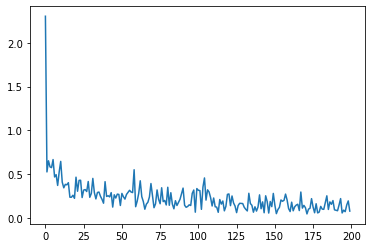

In [9]:
train_loss = []
for epoch in range(num_epoches):
    train(epoch)
    test()
plt.plot(train_loss)